**<font color=#000000 size=5>Linear Regression</font>**

[notes] 2 ways to train a lin reg model:  
1. normal equation (a closed form equation)  
2. gradient descent

[notes] brief intro to lin reg  
More generally, a linear model makes a prediction by simply computing a **weighted sum** of the input features, plus a constant called the **bias term** (also called the **intercept term**)

[model]  
$\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$  
or  
$\hat y = h_{\boldsymbol \theta}(\boldsymbol X) = {\boldsymbol \theta}^T \cdot \boldsymbol X$

[equation] MSE cost function for a Linear Regression model  
$MSE(\boldsymbol X, h_{\boldsymbol \theta}) = MSE(\boldsymbol \theta) = \frac{1}{m}\sum^m_{i = 1}({\boldsymbol \theta}^T \cdot \boldsymbol x^{(i)} - y^{(i)})^2$

**<font color=#000000 size=4>The Normal Equation</font>**

[notes] a closed form solution

[equation] Normal Equation  
$\boldsymbol {\hat \theta} = ({\boldsymbol X}^T \cdot \boldsymbol X)^{-1} \cdot {\boldsymbol X}^T \cdot \boldsymbol y$

[implementation] test the equation

In [1]:
# generate some linear-looking data
import numpy as np

X = 2 * np.random.rand(100, 1)  # rand(shape)
y = 4 + 3 * X + np.random.randn(100, 1)  # + np.random.rand(shape): Gaussian noise

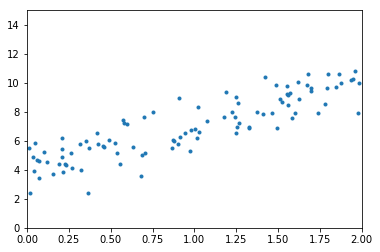

In [2]:
# (plot)

import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(X, y, ".")
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# add x_0 = 1 to each instance
X_b = np.c_[np.ones(X.shape), X]

In [4]:
# calculate the optimal theta
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
# see the results
theta_best

array([[4.0765377 ],
       [3.01706651]])

In [6]:
# make predictions with the calculated theta
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x_0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.0765377 ],
       [10.11067071]])

[equation] ${\boldsymbol y}_{predict} = \boldsymbol{\hat X}_{predict} \cdot \boldsymbol \theta$

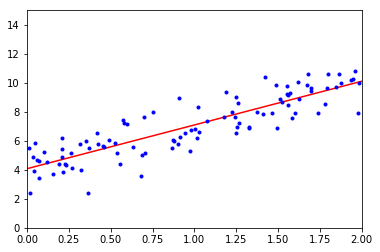

In [7]:
# plot the predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

[sklearn]

In [8]:
from sklearn.linear_model import LinearRegression

# train a lin reg model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# intercept and coefficients
lin_reg.intercept_, lin_reg.coef_

(array([4.0765377]), array([[3.01706651]]))

In [10]:
# predict

lin_reg.predict(X_new)

array([[ 4.0765377 ],
       [10.11067071]])

**<font color=#000000 size=4>Computational Complexity</font>**

[notes]  
disadvantages:  
1. The Normal Equation gets very slow when the number of **features** grows large. (${\boldsymbol X}^T \cdot \boldsymbol X$: an $n \cdot n$ matrix)
  
advantages:  
1.  linear with regards to **the number of instances** in the training set (it is $O(m)$), so it handles large training sets efficiently, provided they can fit in memory.  <font color=red># why linear?</font>
2. **predictions are very fast**:  the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features.  <font color=red>#why linear?</font>

**<font color=#000000 size=5>Gradient Descent</font>**

[notes]  
advantages:  
1. **a large number of features**  
2. when **too many instances to fit in memory**

[notes] random init  
start by filling θ with random values (this is called random initialization)

[notes] the learning rate  
If the learning rate is **too small**, then the algorithm will have to go through many iterations to converge, which will take a long time.  
  
If the learning rate is **too high**, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

[notes] two challenges  
1. converge to a **local minimum**, which is not as good as the global minimum.  
2. take a very **long time to cross the plateau**, and if you stop too early you will never reach the global minimum.

<img src="./img/Figure4_6.png">

[notes] 
Fortunately, the **MSE cost function for a Linear Regression model**:  
1. **convex function**, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum.  
2. It is also a **continuous function** with a slope that never changes abruptly.  
  
These two facts have a great consequence: Gradient Descent is **guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high)**.

[notes] standardization
  
the figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right). 
  
Since feature 1 is smaller, it takes a larger change in $\theta_1$ to affect the cost function, which is why the bowl is elongated along the $\theta_1$ axis.  <font color=red># why larger change?</font>

<img src="./img/Figure4_7.png">

[notes] **standardization** is needed when using gradient descent  
When using Gradient Descent, you should ensure that all features have a **similar scale** (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

**<font color=#000000 size=4>Batch Gradient Descent</font>**

[notes] def  
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to **each** model parameter $\theta_j$.

[equation]  
Partial derivatives of the cost function  
$\frac{\partial}{\partial \theta_j}MSE(\boldsymbol \theta) = \frac{2}{m}\sum^m_{i=1}({\boldsymbol \theta}^T \cdot {\boldsymbol x}^{(i)}- y^{(i)})x^{(i)}_j$  
  
Gradient vector of the cost function  
  

$
\begin{aligned}
\nabla_{\boldsymbol \theta}MSE(\boldsymbol \theta) = 
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\boldsymbol \theta) \\
\frac{\partial}{\partial \theta_1}MSE(\boldsymbol \theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n}MSE(\boldsymbol \theta)
\end{bmatrix}
= \frac{2}{m}{\boldsymbol X}^T \cdot (\boldsymbol X \cdot \boldsymbol \theta - \boldsymbol y)
\end{aligned}
$

[notes] the whole batch  
it uses the **whole** batch of training data at every step. 
  
disadvantages:  
1.  it is terribly **slow** on very **large training sets**  
  
advantages:  
1. Gradient Descent **scales well with the number of features**; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

[equation] Gradient Descent step  
${\boldsymbol \theta}^{(next step)} = \boldsymbol \theta - \eta \nabla_{\boldsymbol \theta}MSE(\boldsymbol \theta)$

[implementation]

In [11]:
# hyperparameters of BGD
eta = 0.1  # learning rate
n_iterations = 1000  # number of iterations

m = 100  # data size

theta = np.random.randn(2, 1)  # random init

# iteration
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
# check theta
theta

array([[4.0765377 ],
       [3.01706651]])

[notes] difference btw rand() and randn(): [numpy.random.randn()与rand()的区别](https://blog.csdn.net/u010758410/article/details/71799142)

[notes] find a good learning rate and set the number of iterations    
To **find a good learning rate**, you can use **grid search**. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.  
  
You may wonder **how to set the number of iterations**. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. **A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny**—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has
(almost) reached the minimum.

[notes] convergence rate  
When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), it can be shown that Batch Gradient Descent **with a fixed learning rate** has a convergence rate of $O(\frac{1}{iterations})$. In other words, if you divide the tolerance $\epsilon$ by 10 (to have a more precise solution), then the algorithm will have to run about 10 times more iterations.

**<font color=#000000 size=4>Stochastic Gradient Descent</font>**

[notes] def  
Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

[notes]  
advantages:  
1. this makes the algorithm much **faster** since it has very little data to manipulate at every iteration.  
2. It also makes it possible to **train on huge training sets**, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm)  
3.When **the cost function is very irregular**, this can actually help the algorithm **jump out of local minima**, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.  
  
disadvantages:  
1. this algorithm is **much less regular** than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, **decreasing only on average**. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). **So once the algorithm stops, the final parameter values are good, but not optimal.**

[notes] one sulution to the dilemma that the algorithm never settles at the mininum  
One solution is to **gradually reduce the learning rate**. The steps **start out large** (which **helps make quick progress** and **escape local minima**), then **get smaller and smaller**, **allowing the
algorithm to settle at the global minimum.**    

[notes] learning schedule  
**The function that determines the learning rate at each iteration** is called **the learning schedule**. 

[notes] trade-off of the reducing speed of the learning rate  
**If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.**

[implementation] 

In [12]:
# hyperparameters of SGD
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

# learning schedule
def learning_schedule(t):
    return t0 / (t + t1)

# random init
theta = np.random.randn(2, 1)

# iteration
for epoch in range(n_epochs):
    for i in range(m):
        # randomly select an instance
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # not needed to / m
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

# check theta
theta

array([[4.07890078],
       [3.0177272 ]])

[notes] why (epoch * m + i)?  

when epoch = 0:  
&nbsp;&nbsp;&nbsp;&nbsp;t = 0, 1, ..., m - 1  
  
when epoch = 1:  
&nbsp;&nbsp;&nbsp;&nbsp;t = m, m + 1, ..., 2m - 1  
  
thus the learning rate reduces gradually.

[notes] BGD vs SGD
in the example above,  
BSG iterates the **whole** set for **1000** times to update theta for 1000 times.  
SGD iterates the **whole** set for **50** times to update theta for 50 * 100 = 5000 times

[notes] shuffle the training set to make each instance processed in each epoch
Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm **goes through every instance at each epoch**, another approach is to **shuffle the training set, then go through it instance by instance, then shuffle it again (to guarantee random selection), and so on. However, this generally converges more slowly.**

[sklearn]

In [13]:
from sklearn.linear_model import SGDRegressor

# train a sgd reg model
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)  # 50 epochs
sgd_reg.fit(X, y.ravel())

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [14]:
# intercept and coefficients
sgd_reg.intercept_, sgd_reg.coef_

(array([4.02886716]), array([2.97221286]))

**<font color=#000000 size=4>Mini-batch Gradient Descent</font>**

[notes] def  
at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called minibatches. 

[notes]  
advantages:  
1. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.  
2. The algorithm’s progress in parameter space is **less erratic** than with SGD, especially **with fairly large mini-batches**. As a result, Mini-batch GD will end up walking around a bit **closer to the minimum than SGD.**  
  
disadvantages:  
1.  it may be **harder** for it to **escape from local minima**

**<font color=#000000 size=5>Polynomial Regression</font>**

[notes] you can actually use a linear model to fit nonlinear data

[notes] for a quadratic function:  
add the square (2nd-degree polynomial) of **each feature** in the training set as new features

[sklearn]

In [15]:
# generate some nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

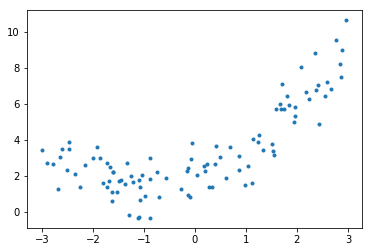

In [16]:
# plot
plt.plot(X, y, ".")
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# train a transformer
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# transform data
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-0.27217776]), array([-0.27217776,  0.07408073]))

In [18]:
# train a model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# intercept and coefficients
lin_reg.intercept_, lin_reg.coef_

(array([1.91216112]), array([[0.94871831, 0.49908145]]))

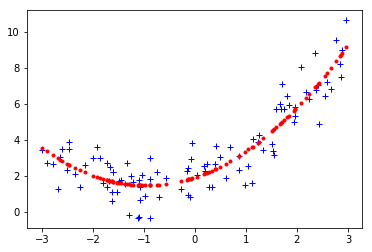

In [20]:
# plot
y_predict = lin_reg.predict(X_poly)
plt.plot(X, y, "b+")
plt.plot(X, y_predict, "r.")
plt.show()

[notes] find relationships  
Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the
features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

[notes] combinatorial explosion  
PolynomialFeatures(degree=d) transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!

**<font color=#000000 size=5>Learning Curves</font>**

[notes] high-degree polynomial models are prone to overfit.

[notes] decide how complex the model should be an if its underfitting or overfitting
in general you won’t know what function generated the data, so how can you decide **how complex** your model should be? How can you tell that your model is **overfitting or underfitting** the data?  
  
1. cv. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting.   
  
2. Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size. **To generate the plots, simply train the model several times on different sized subsets of the training set.** 

[sklearn] generate the learning curves of a lin reg model on the quadratic data

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
            # train a model
            model.fit(X_train[:m], y_train[:m])
            
            # predict
            y_train_predict = model.predict(X_train[:m])
            y_val_predict = model.predict(X_val)
            
            # append the mse to the list
            train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
            val_errors.append(mean_squared_error(y_val_predict, y_val))

    # plot
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

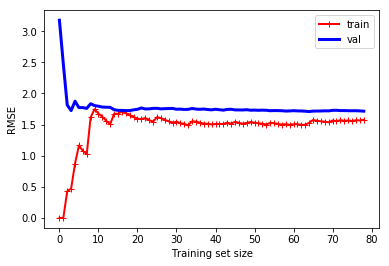

In [22]:
# plot the learning curves of the lin reg model
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

[notes] explanation  
First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, **both because the data is noisy and because it is not linear at all.** So the error on the training data goes up until it reaches a plateau, **at which point adding new instances to the training set doesn’t make the average error much better or worse.**  
Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.


[notes] a typical underfitting model  
These learning curves are typical of an **underfitting model**. **Both** curves have reached a **plateau**; they are **close and fairly high.**

[notes] solutions to a underfitting model  
If your model is underfitting the training data, **adding more training examples will not help**. You need to **use a more complex model**
or **come up with better features.**

[sklearn] the learning curves of a $10^{th}$-degree poly model on the same data

In [23]:
from sklearn.pipeline import Pipeline

# create a pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
))

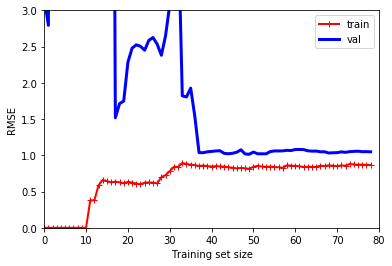

In [24]:
# plot
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

[notes] a typical overfitting model  
There is a **gap** between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an **overfitting model**. **However, if you used a much larger training set, the two curves would continue to get closer.**

[notes] solutions to a overfitting model
One way to improve an overfitting model is to feed it **more training data** until the validation error reaches the training error.

[notes] the bias/variance tradeoff
An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the **sum** of three very different errors:  
  
**Bias**  
This part of the generalization error is due to **wrong assumptions**, such as assuming that the data is linear when it is actually quadratic. A **high-bias** model is most likely to **underfit the training data.**  
  
**Variance**  
This part is due to the model’s **excessive sensitivity to small variations** in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to **overfit** the training data.  
  
**Irreducible error**  
This part is due to the **noisiness of the data itself**. The only way to reduce this part of the error is to **clean up** the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).  
  
**Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance**. This is why it is called a tradeoff.

**<font color=#000000 size=5>Regularized Linear Models</font>**

[notes]  the fewer degrees of freedom a model has, the harder it will be for it to overfit the data.  
  
For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees.  
  
For a linear model, regularization is typically achieved by constraining the weights of the model.

**<font color=#000000 size=4>Ridge Regression</font>**

[notes] intro
a regularization term equal to $\alpha \sum^n_{i = 1}{\theta_i}^2$ is added to the cost function. This forces the learning algorithm to **not only fit the data but also keep the model weights as small as possible.**  
  
Note that the regularization term should **only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.**

[notes] reasons for why a cost func used for training is diff from the performance measure for testing  
Apart from regularization, another reason why they might be different is that a good training cost function should have **optimization friendly derivatives**, while the performance measure used for testing should be **as close as possible to the final objective.**

[notes] about the alpha  
If α = 0 then Ridge Regression is just Linear Regression.  
If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.  <font color=red># why mean?</font>

<img src="img/Figure4_17.png">

[equation]  Ridge Regression cost function
$J(\boldsymbol \theta) = MSE(\boldsymbol \theta) + \alpha\frac{1}{2}\sum^n_{i = 1}{\boldsymbol \theta_i}^2$

[notes] the bias term is not regularized

[notes] the vectorized form  
If we define $\boldsymbol w$ as the vector of feature weights ($theta_1$ to $\theta_n$), then the regularization term is
simply equal to $\frac{1}{2}(||\boldsymbol w||_2)^2$, where $|| \cdot ||_2$ represents the ℓ2 norm of the weight vector. For Gradient Descent, just add $\alpha \boldsymbol w$ to the MSE gradient vector

[notes] scale the data before implementing regularizations  
It is important to **scale the data** (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. **This is true of most regularized models**

[equation]  Ridge Regression closed-form solution  
$\hat {\boldsymbol \theta} = ({\boldsymbol X}^T \cdot \boldsymbol X + \alpha \boldsymbol A)^{-1} \cdot {\boldsymbol X}^T \cdot \boldsymbol y$  <font color=red># derivation?</font>
  
A is the n × n identity matrix (A square matrix full of 0s except for 1s on the main diagonal (top-left to bottom-right).) except with a 0 in the top-left cell, corresponding to the bias term).

[sklearn] ridge reg with sklearn, using Ridge

In [25]:
from sklearn.linear_model import Ridge

# train a model
ridge_reg = Ridge(alpha=1, solver="cholesky")
# "cholesky" a closed-form solution (a variant of the equation above 
# using a matrix factorization technique by André-Louis Cholesky):

ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [26]:
# predict
ridge_reg.predict([[1.5]])

array([[4.89133634]])

[sklearn] ridge reg with SGD

In [36]:
# train a model
ridge_sgd_reg = SGDRegressor(penalty="l2")
ridge_sgd_reg.fit(X, y.ravel())

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [37]:
# predict
ridge_sgd_reg.predict([[1.5]])

array([4.03568558])

**<font color=#000000 size=4>Lasso Regression</font>**

[equation]  Lasso Regression cost function
$J(\boldsymbol \theta) = MSE(\boldsymbol \theta) + \alpha \sum^n_{i = 1}|\theta_i|$

[notes] feature selection  
An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero). . For example, the dashed line in the right plot (with α = 10-7) looks quadratic (the actual degree is 10), almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

<img src="img/Figure4_18.png">

[notes] subgradient vector  
The Lasso cost function is not differentiable at θi = 0 (for i = 1, 2, ⋯, n), but Gradient Descent still works fine if you use a subgradient vector g (You can think of a subgradient vector at a nondifferentiable point as an intermediate vector between the gradient vectors around that point.) instead when any θi = 0.

[equation] Lasso Regression subgradient vector  
$g(\boldsymbol \theta, J) = \nabla_{\boldsymbol \theta} MSE(\boldsymbol \theta) + \alpha
\begin{bmatrix}
sign(\theta_1) \\
sign(\theta_2) \\
\vdots \\
sign(\theta_n) \\
\end{bmatrix}
where 
sign(\theta_i) =\left\{
\begin{aligned}
-1 & \quad if\; \theta_i < 0 \\
0 & \quad if\; \theta_i = 0 \\
+1 & \quad if\; \theta_i > 0
\end{aligned}
\right.
$

[sklearn] lasso reg using Lasso

In [34]:
from sklearn.linear_model import Lasso

# train a model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
# predict
lasso_reg.predict([[1.5]])

array([4.84504148])

[sklearn] lasso using SGD

In [41]:
# train a model
lasso_sgd_reg = SGDRegressor(penalty="l1")
lasso_sgd_reg.fit(X, y.ravel())

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [42]:
# predict
lasso_sgd_reg.predict([[1.5]])

array([4.0767993])

**<font color=#000000 size=4>Elastic Net</font>**

[notes] intro  
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When **r = 0**, Elastic Net is equivalent to **Ridge Regression**, and when **r = 1**, it is equivalent to **Lasso Regression**

[equation] Elastic Net cost function
$J(\boldsymbol \theta) = MSE(\boldsymbol \theta) + r \alpha \sum^n_{i = 1} |\theta_i| + \frac{1 - r}{2} \alpha \sum^n_{i = 1} {\theta_i}^2$

[notes] selection among ridge, lasso and elastic  
So when should you use Linear Regression, Ridge, Lasso, or Elastic Net? It is **almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.**  
  
**Ridge** is a **good default**,   
   
but if you suspect that **only a few features are actually useful**, you should prefer **Lasso or Elastic Net since they tend to reduce the useless features’weights down to zero** as we have discussed. In general, **Elastic Net is preferred over Lasso** since Lasso may **behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.**  <font color=red># why behave erratically?</font>

[sklearn] elastic net

In [45]:
from sklearn.linear_model import ElasticNet

# train a model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio corresponds to the mix ratio r
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
# predict
elastic_net.predict([[1.5]])

array([4.8455854])

**<font color=#000000 size=4>Early Stopping</font>**

[notes] intro  
A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. After training for a while the **validation error stops decreasing and actually starts to go back up.** This indicates that the model has started to **overfit*** the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. 

[notes] when apply it to SGD and mini-batch GD  
With Stochastic and Mini-batch Gradient Descent, the curves are **not so smooth**, and it may be **hard to know whether you have reached the minimum or not.** One solution is to **stop only after the validation error has been above the minimum for some time** (when you are confident that the model will not do any better), then **roll back the model parameters to the point where the validation error was at a minimum.**

[sklearn] early stopping

In [66]:
# preparation
from sklearn.preprocessing import StandardScaler

X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X, y, test_size=0.2)

# scale
std_scaler = StandardScaler()
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)
X_val_poly_scaled = std_scaler.fit_transform(X_val_poly)

y_train = y_train_poly
y_val = y_val_poly

In [71]:
# early stopping
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, 
                       learning_rate="constant", eta0=0.0005)  # 1 iter per time

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(100):
    # train a model
    sgd_reg.fit(X_train_poly_scaled, y_train_poly)  # continues where it left off
    
    # predict
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    # mse
    val_error = mean_squared_error(y_val_predict, y_val)
    
    # find the optimal
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\Neko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\N

[notes] Note that with warm_start=True, when the fit() method is called, it just continues training where it left off instead of restarting from scratch.